##### Aprendizaje para determinar Estrellas

#### Ocupado el Notebook Regresión logistica usando gradiante descendiente v/s ’liblinear’

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df2 = pd.read_csv("../datos/SDSS-DR14.csv")
df2.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Podemos determinar que gran cantidad de datos forman parte de un formato numérico, por lo que no presentará problemas en la comparación y representación de los mismos.

In [4]:
df2.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

Logramos ver ademas que basado en al dataset en su complejidad, no nos daría inconsistencias en cuanto al exceso de ruido que ésto pueda generar.

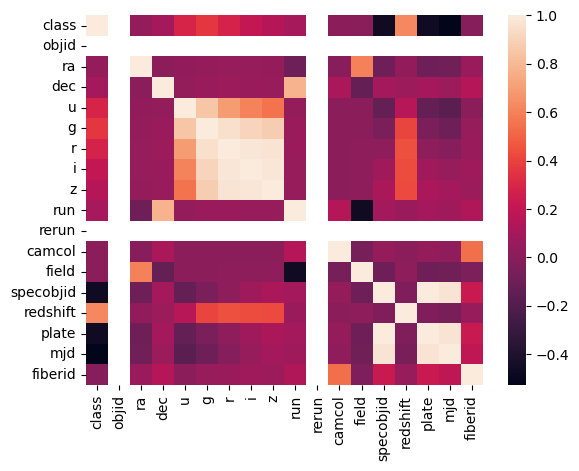

In [4]:
#código solamente para efecto práctico de mapa de calor
df2_test = df2[['class']]
df2_cp = df2
for n in range(df2_test.shape[0]):
    if df2_test.iloc[n,0] =='STAR':
        df2_test.iloc[n,0] = 1
    elif df2_test.iloc[n,0] =='GALAXY':
        df2_test.iloc[n,0] = 2
    elif df2_test.iloc[n,0] =='QSO':
        df2_test.iloc[n,0] = 3
df2_test.head()

df2_cut = df2_cp.drop(['class'],axis=1)
df2_plot = pd.concat([df2_test,df2_cut],axis=1)
#Print
sb.heatmap(df2_plot.corr())

#Restauro data
df2_data = df2

<Axes: xlabel='class', ylabel='u'>

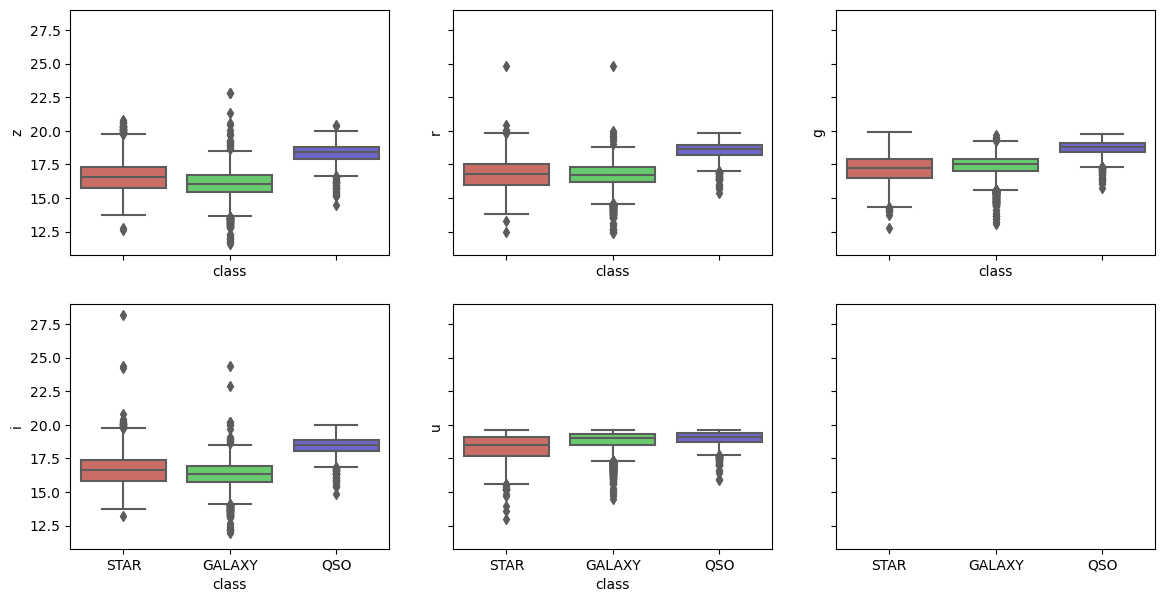

In [5]:
fig, axes = plt.subplots(2, 3,figsize=(14,7), sharex=True, sharey=True)
sb.boxplot(palette='hls', data=df2_data,x="class", y='z',ax=axes[0,0])
sb.boxplot(palette='hls', data=df2_data,x="class", y='r',ax=axes[0,1])
sb.boxplot(palette='hls', data=df2_data,x="class", y='g',ax=axes[0,2])
sb.boxplot(palette='hls', data=df2_data,x="class", y='i',ax=axes[1,0])
sb.boxplot(palette='hls', data=df2_data,x="class", y='u',ax=axes[1,1])

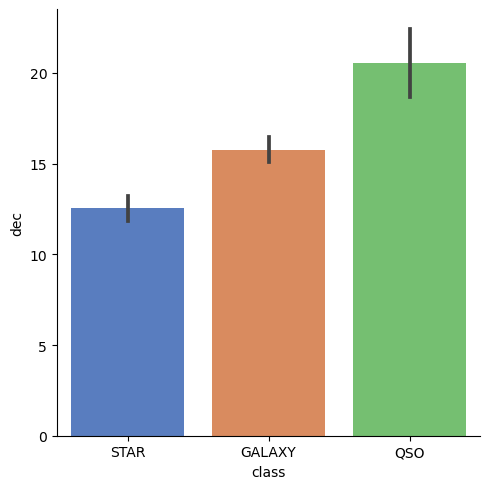

In [6]:
sb.catplot(palette='muted', kind='bar',data=df2_data,x="class", y='dec')

### Transformación de clases a variables numéricas

In [7]:
df2_data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [8]:
df2_class = df2_data[['class']]
df2_dum = pd.get_dummies(df2_class)
df2_dum.head()

,class_GALAXY,class_QSO,class_STAR
0,False,False,True
1,False,False,True
2,True,False,False
3,False,False,True
4,False,False,True


In [9]:
df2_galaxy= df2_dum.drop(['class_GALAXY','class_QSO'],axis=1)
df2_full = df2_data.drop(['class'],axis=1)
df2_data = pd.concat([df2_galaxy,df2_full],axis=1)
df2_data.head()

,class_STAR,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,True,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,-0.000009,3306,54922,491
1,True,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,-0.000055,323,51615,541
2,False,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0.123111,287,52023,513
3,True,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,-0.000111,3306,54922,510
4,True,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0.000590,3306,54922,512


###  Revision del dataset

In [10]:
df2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class_STAR  10000 non-null  bool   
 1   objid       10000 non-null  float64
 2   ra          10000 non-null  float64
 3   dec         10000 non-null  float64
 4   u           10000 non-null  float64
 5   g           10000 non-null  float64
 6   r           10000 non-null  float64
 7   i           10000 non-null  float64
 8   z           10000 non-null  float64
 9   run         10000 non-null  int64  
 10  rerun       10000 non-null  int64  
 11  camcol      10000 non-null  int64  
 12  field       10000 non-null  int64  
 13  specobjid   10000 non-null  float64
 14  redshift    10000 non-null  float64
 15  plate       10000 non-null  int64  
 16  mjd         10000 non-null  int64  
 17  fiberid     10000 non-null  int64  
dtypes: bool(1), float64(10), int64(7)
memory usage: 1.3 MB


In [11]:
df2_data.isnull().sum()

class_STAR    0
objid         0
ra            0
dec           0
u             0
g             0
r             0
i             0
z             0
run           0
rerun         0
camcol        0
field         0
specobjid     0
redshift      0
plate         0
mjd           0
fiberid       0
dtype: int64

In [12]:
df2_data.shape

(10000, 18)

### Proceso de entrenamiento y clasificación usando gradiante descendiente

In [13]:
X = df2_data.iloc[:,1:df2_data.shape[1]].values
y = df2_data.iloc[:,0].values

In [14]:
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))

def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def gradient_descent(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]

def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

def log_likelihood(x, y, weights):
    z = np.dot(x, weights)
    ll = np.sum( y*z - np.log(1 + np.exp(z)) )
    return ll

In [15]:
import time
start_time = time.time()

num_iter = 1000

intercept = np.ones((X.shape[0], 1)) 
X = np.concatenate((intercept, X), axis=1)
theta = np.zeros(X.shape[1])

for i in range(num_iter):
    h = sigmoid(X, theta)
    gradient = gradient_descent(X, h, y)
    theta = update_weight_loss(theta, 0.1, gradient)
    #print(theta)

print("Training time (Log Reg using Gradient descent):" + str(time.time() - start_time) + " seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

Training time (Log Reg using Gradient descent):0.9485516548156738 seconds
Learning rate: 0.1
Iteration: 1000


In [16]:
result = sigmoid(X, theta)

In [17]:
print(result)

[1. 0. 0. ... 1. 0. 0.]


In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y, result)
print(confusion_matrix)
print(classification_report(y, result))

[[5555  293]
 [1044 3108]]
              precision    recall  f1-score   support

       False       0.84      0.95      0.89      5848
        True       0.91      0.75      0.82      4152

    accuracy                           0.87     10000
   macro avg       0.88      0.85      0.86     10000
weighted avg       0.87      0.87      0.86     10000



## Usando algoritmo de aprendizaje a través de Scikit-Learn en la obtención de resultados

In [19]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)
#print(X_test)

In [21]:
#Aprendizaje
LogReg = LogisticRegression(max_iter=1000,penalty='l1',solver='liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

In [22]:
#Predicciones
y_pred = LogReg.predict(X_test)
y_pred

array([False, False, False, ...,  True, False, False])

In [23]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1685,   15],
       [   0, 1300]])

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.99      1.00      1700
        True       0.99      1.00      0.99      1300

    accuracy                           0.99      3000
   macro avg       0.99      1.00      0.99      3000
weighted avg       1.00      0.99      1.00      3000

